In [1]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import math
import scipy.io as scio
import reverse_geocode
import pycountry_convert as pc

In [8]:
constellations=["starlink","kuiper","oneweb","iridium"]
policy="P_OPT"
constellation="starlink"

In [22]:
# Number of single star users, Number of 4 kinds of users: [4 scenes, 99 minutes, 1584 satellites, byte and num]
# horizontal coordinates are time, vertical coordinates are overhead, total 4 scenes * 4 kinds of users, 16 lines
# for a particular satellite
select_sat=245
case_byte={}
case_num={}
name_s=['a','b','c','d']
single_upbound=[2000,10000,20000,30000]
for user in single_upbound:
    tmp=[]
    byte=[]#4*99
    num=[]
    for i in range(4):
        s_index=i
        #starlink
        tmp=np.array(np.load("data/starlink/distributedscenario_"+name_s[s_index]+"_"+str(user)+".npy"))
        byte.append([mins[select_sat][0]/(60) for mins in tmp])#Mbps
        num.append([mins[select_sat][1]/(60) for mins in tmp])
        
    print(np.shape(byte))
    case_byte[user]=byte
    case_num[user]=num

(4, 99)
(4, 99)
(4, 99)
(4, 99)


In [16]:
#Linking latitude and longitude to continents
# modify Lib\site-packages\reverse_geocode_init_.py and edit open(,encoding="utf-8")
points=np.load("data/"+str(select_sat)+"points.npy")
tmp=reverse_geocode.search(points)
country_code=[t['country_code'] for t in tmp]
continents=[]
continent_name=[]
for i in range(len(country_code)):
    if('PN' in country_code[i]):
        continent_name.append("OC")
    elif('EH' in country_code[i]):
        continent_name.append("AF")
    else:
        continent_name.append(pc.country_alpha2_to_continent_code(country_code[i]))
    if len(continent_name)==1 or continent_name[-1]!=continent_name[-2]:
        print(str(i)+":"+continent_name[-1]+" "+country_code[i])
print(tmp[55])


0:EU GR
1:AS TR
2:EU RO
9:AS KZ
11:EU RU
15:AS MN
28:OC MP
58:SA CL
84:AF CV
91:EU ES
93:AF MA
95:EU ES
{'country_code': 'PN', 'city': 'Adamstown', 'country': 'Pitcairn'}


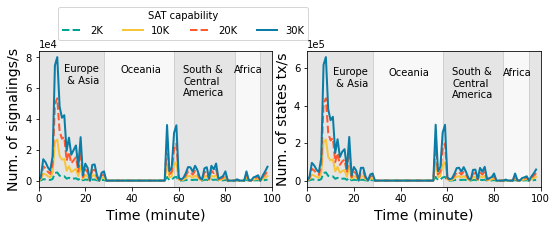

In [21]:
#取一颗卫星在starlink星座，场景3情况下的state transfer的结果
fig=plt.figure(figsize=(9,2.5))
xmins=range(99)
color=["#00A491","#F6C53A","#FF592D","#0A7CA5"]
scenaio=["Radio only","data session","session & mobility","all functions"]
users=["2K","10K","20K","30K"]
linestyle=["--","-","--","-"]
plt.subplot(121)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15)
node=[28,58,84,95,100]#Asia and Europe, Oceania, Africa, Asia and Europe
# plt.fill_between(x[0:28],0,20,facecolor='green', alpha=0.3)
for i in range(len(node)):
    if i==0:
        plt.axvspan(0,node[i], alpha=0.1, color='black')
    else:
        if i%2==0:
            plt.axvspan(node[i-1],node[i], alpha=0.1, color='black')
        else:
            plt.axvspan(node[i-1],node[i], alpha=0.05,color='grey')
#     plt.axvspan(100,0, alpha=0.1,color='grey')
plt.xlim([0,100])
for i in range(len(single_upbound)):
    s_index=3
    plt.plot(xmins[0:],case_byte[single_upbound[i]][s_index][0:],color=color[i],linestyle=linestyle[i],label=users[i],linewidth=2)
# plt.legend(title="SAT capability\n(users per SAT)",loc="upper right")
plt.xlabel("Time (minute)",fontsize=14)
plt.ylabel("Num. of signalings/s",fontsize=14)
plt.ticklabel_format(style='sci',scilimits=(4,4),axis='y')

plt.text(11,6.3e4,"Europe \n & Asia")
plt.text(35,7e4,"Oceania")
plt.text(62,5.5e4,"South &\nCentral\nAmerica")
plt.text(83.6,7e4,"Africa")
plt.subplot(122)
for i in range(len(node)):
    if i==0:
        plt.axvspan(0,node[i], alpha=0.1, color='black')
    else:
        if i%2==0:
            plt.axvspan(node[i-1],node[i], alpha=0.1, color='black')
        else:
            plt.axvspan(node[i-1],node[i], alpha=0.05,color='grey')
#     plt.axvspan(100,0, alpha=0.1,color='grey')
for i in range(len(single_upbound)):
    s_index=3
    plt.plot(xmins,case_num[single_upbound[i]][s_index][0:],color=color[i],linestyle=linestyle[i],label=users[i],linewidth=2)
plt.legend(title="SAT capability",loc="upper right",ncol=4,bbox_to_anchor=(0.025, 1.36))
plt.xlabel("Time (minute)",fontsize=14)
plt.ylabel("Num. of states tx/s",fontsize=14)
plt.xlim([0,100])
plt.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
# plt.savefig(constellation+"_case_num.pdf",bbox_inches='tight')
plt.text(11,5e5,"Europe \n & Asia")
plt.text(35,5.6e5,"Oceania")
plt.text(62,4.4e5,"South &\nCentral\nAmerica")
plt.text(83.6,5.6e5,"Africa")

plt.savefig("figure12.pdf",bbox_inches='tight')
        